In [1]:
#Importing the required dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_column', None)
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_seq_items', None)
pd.set_option('display.max_colwidth', 1000)
pd.set_option('expand_frame_repr', True)

In [2]:
#Loading the dataset
twtter_sentiment_df = pd.read_csv('../data/Tweets.csv')
# twtter_sentiment_df.head()

Lets analyze sentiment and its relation with other attributes

Text(0.5, 1.0, 'proportion of Sentiments')

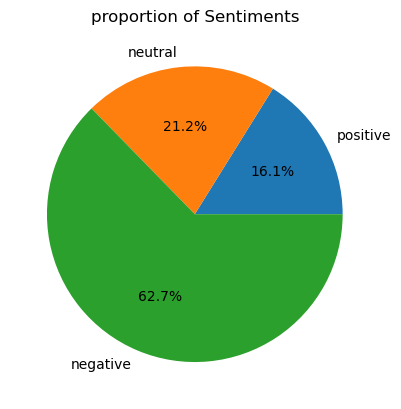

In [3]:
#Sentiment Count
x = twtter_sentiment_df.airline_sentiment.value_counts().sort_values()
ax = plt.pie(x = x, labels=x.index, autopct = '%1.1f%%')
plt.title('proportion of Sentiments')
# ax.bar_label(ax.containers[0])

From the above plot,we can see that negative sentiment is dominating against other sentiments

Text(0.5, 0, 'Sentiment count')

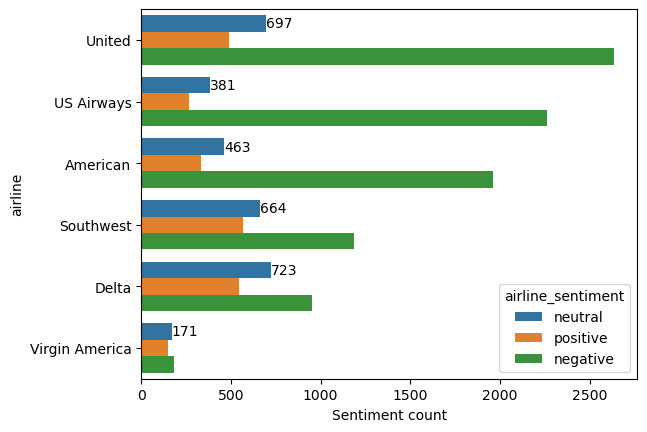

In [4]:
#Analyzing the sentiment for all airlines
g=sns.countplot(y='airline',hue='airline_sentiment',data=twtter_sentiment_df,order = twtter_sentiment_df.airline.value_counts().index)
g.bar_label(g.containers[0])
plt.xlabel('Sentiment count')

From the above plot we can deduce that except for airlines 'Virgin America' all other airlines possess negative sentiment as a dominant sentiment as compared to positive and neutral.<br>
It is evident that people are not happy with the airline services, let's analzye the root cause of their behavior.

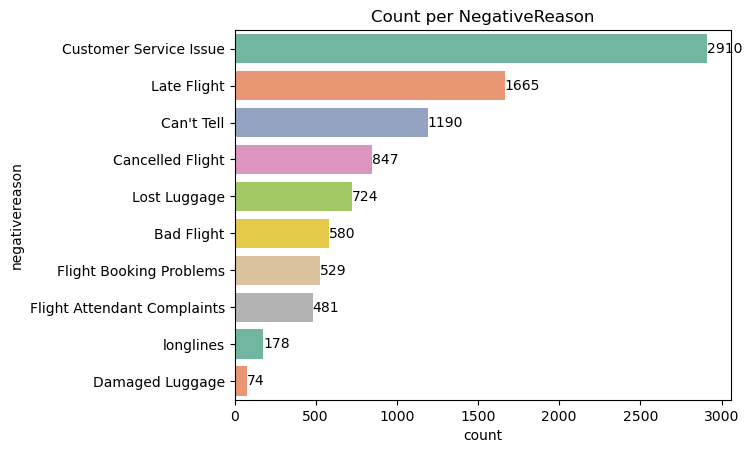

In [5]:
#Lets analyze the reason for this dominant negative sentiment that can potentially hamper the airline brand image
ax = sns.countplot(data = twtter_sentiment_df, y = 'negativereason',
                   palette='Set2',
                   order = twtter_sentiment_df.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason')

plt.show()

Customer Service Issue is the major reason for most of the negative tweets followed by Late Flight and others.

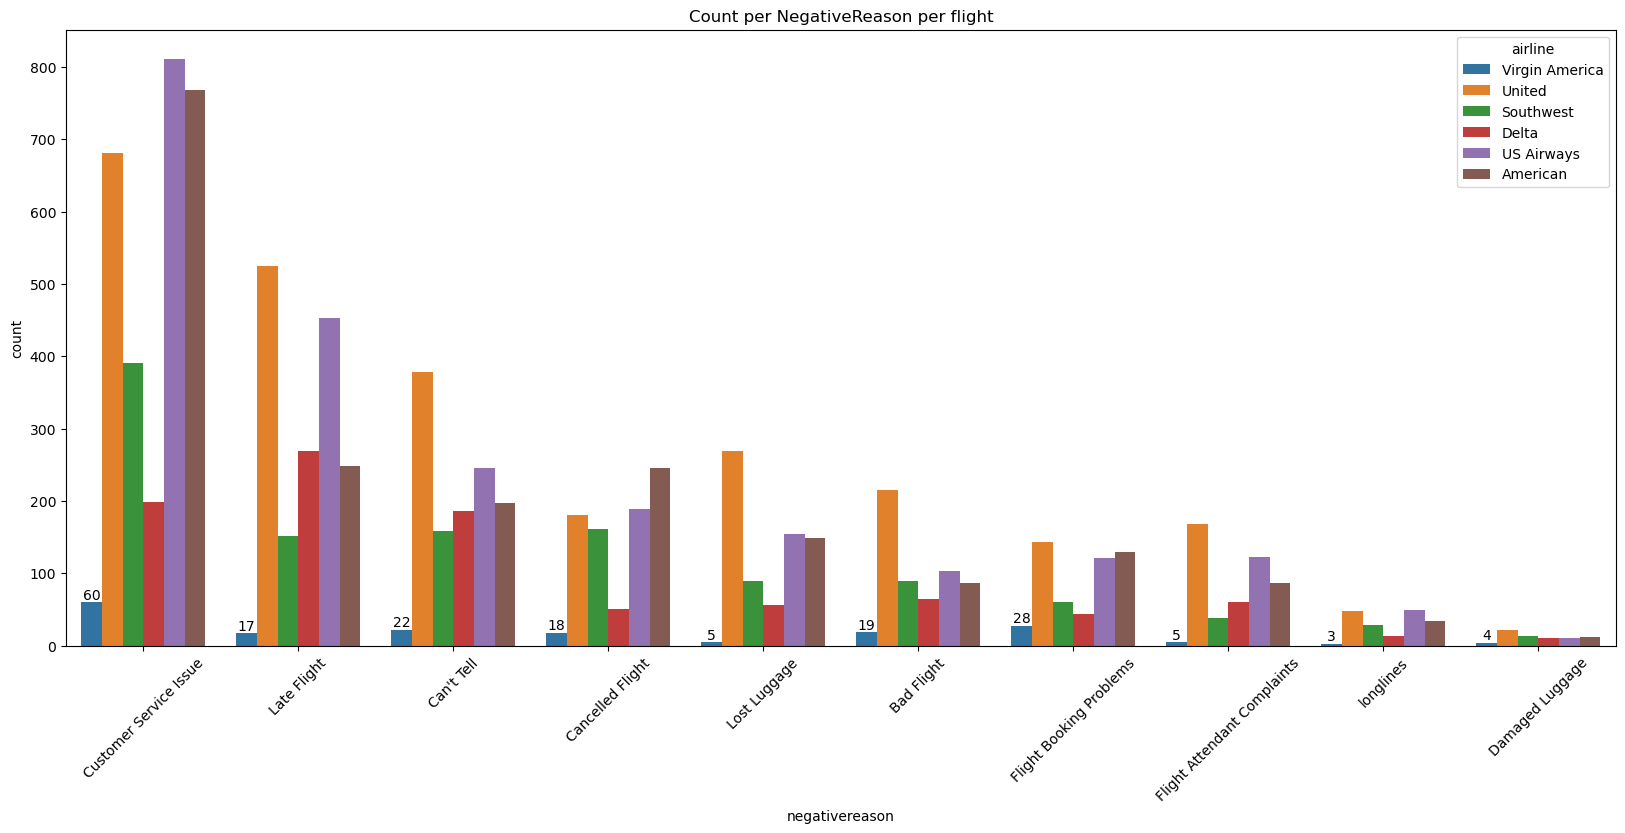

In [113]:
ax = sns.countplot(data = twtter_sentiment_df, x = 'negativereason',
                   hue='airline',
                   order = twtter_sentiment_df.negativereason.value_counts().index)

ax.bar_label(ax.containers[0])
ax.set_title('Count per NegativeReason per flight')
plt.rcParams["figure.figsize"] = (30,8)
plt.xticks(rotation=45)
plt.show()

Observations from above plot-<br>
1.'Customer Service Issue' is the dominant negative reason reported by users in all airlines except Delta.<br>
2.Users complained 'Late Flight' issue the most in 'Delta' airline amongst the other negative reasons.<br>
3.'Virgin America' airline has the least amount of issues reported by users as compared to other airlines.

d:\Miniconda3\envs\sentiment\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


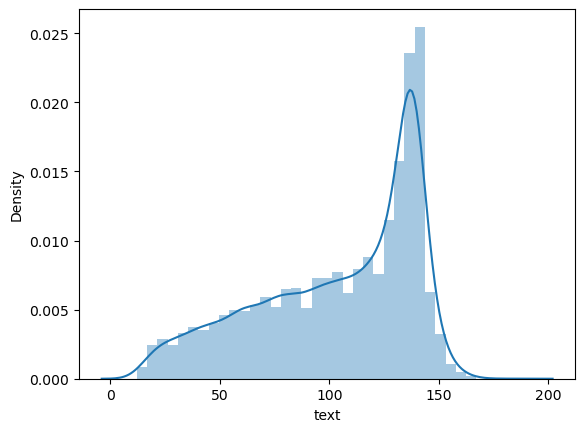

In [3]:
sns.distplot(twtter_sentiment_df.text.str.len())
plt.rcParams["figure.figsize"] = (10,2)
plt.show()

In [125]:
twtter_sentiment_df.text.str.len().describe()

count    14640.000000
mean       103.822063
std         36.277339
min         12.000000
25%         77.000000
50%        114.000000
75%        136.000000
max        186.000000
Name: text, dtype: float64

We can see that minimum lenght of tweets can vary from 12 to 186, having an average length of 103

In [4]:
twtter_sentiment_df['text_len'] = twtter_sentiment_df.text.str.len()
review_len_df = twtter_sentiment_df.groupby('airline_sentiment')['text_len'].mean()

In [127]:
review_len_df

airline_sentiment
negative    113.947919
neutral      87.359471
positive     86.082945
Name: text_len, dtype: float64

Negative sentiment tweets have the highest average length of 113, that is 30% more than neutral or positive tweet length

In [29]:
twtter_sentiment_df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [7]:
#Lets analyze the most frequent words that consitute negative sentiment
# negative_sentiment_texts = twtter_sentiment_df.loc[twtter_sentiment_df.airline_sentiment == 'negative',['text']]
# negative_sentiment_texts.sample(n=5)
sentiment_analyzer_df = twtter_sentiment_df.loc[:,['text','airline_sentiment','negativereason']]

In [28]:
sentiment_analyzer_df.text.isnull().sum()

0

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\naman.gupta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [5]:

import nltk
from nltk.corpus import stopwords

nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.stem import WordNetLemmatizer

# Elements to be deleted
to_delete = ['no', 'nor', 'not']

STOPWORDS = set(stopwords.words('english'))
# Remove all elements of list from the set
STOPWORDS.difference_update(to_delete)

lemmatizer = WordNetLemmatizer()




[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\naman.gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\naman.gupta\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [4]:
import re
def decontracted(phrase):
    phrase = re.sub(r"\w+(\'t|\'nt)", " not", phrase)
    phrase = re.sub(r"\w+\'re", " are", phrase)
    phrase = re.sub(r"\w+\'s", " is", phrase)
    phrase = re.sub(r"\w+\'d", " would", phrase)
    phrase = re.sub(r"\w+\'ll", " will", phrase)
    phrase = re.sub(r"\w+\'ve", " have", phrase)
    phrase = re.sub(r"\w+\'m", " am", phrase)
    return phrase


In [3]:
#The tweets contains @mentions,stopwords,punctuations that will not contribute towards the sentiment analysis model.
import re

def preprocessTweet(text):
    #Removing the @ mentions
    text = re.sub('@[a-zA-Z]+','',text)
    #removing external links(http etc)
    text = re.sub('(http|https)://\w+.?\w+/\w+',"",text)
    #De-contracting the negative punctuation words
    text = decontracted(text)
    #Removing digits,punctuations
    text= re.sub('[^a-zA-Z\s]',' ',text)
    #De-contracting the punctuation words
    text = decontracted(text)
    #Replacing extra spaces with a single space
    text = re.sub('\s+',' ',text)
    text = text.lower()
    
    
    #NOTE:Lemmatization can also introduce some noise, like was-> wa
    text = " ".join([lemmatizer.lemmatize(word) for word in text.split()])
    #Removing words having length<2, as they dosen't signify meaning for our analysis except for word like 'no'
    text = " ".join([word for word in str(text).split() if len(word) >2 or word == 'no'])

    return text 

In [8]:
sentiment_analyzer_df.text = sentiment_analyzer_df.text.apply(preprocessTweet)

Words like no,nor,not signifies negative sentence formation, hence we'll not remove these words from our text

In [9]:
sentiment_analyzer_df.text.sample(n=10)

428                                                             now when will see virginamerica come philadelphia phl
14519                                 because you doing the one thing tried avoid thank you for sending baggage claim
3328                             how you silver elite for two straight year group all the time get no group but maybe
13408                                                                     need back cleveland early possible tomorrow
11362                                                                                     your app suck ball compared
7843     the first place but really not need the extra stress this already terrible time the way made the flight with
8413            case making jackass out not allowed favor say get right care no out vacation now true see peter scott
1660                                                   now let there also pls flight live den ewr can watch the oscar
4901                                                    

In [10]:
def convert_Sentiment(sentiment):
    if  sentiment == "positive":
        return 2
    elif sentiment == "neutral":
        return 1
    elif sentiment == "negative":
        return 0
    
Y = sentiment_analyzer_df.airline_sentiment.apply(lambda x : convert_Sentiment(x))

In [11]:
X = sentiment_analyzer_df.text

In [12]:
# X = 
Y.value_counts()

0    9178
1    3099
2    2363
Name: airline_sentiment, dtype: int64

The distribution is highly imbalanced, proper handling is required in order for the model to perform on unseen data

In [13]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [44]:
model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
              MultinomialNB(),
              SVC(**model_params)]
model_names = ['LogisticRegression', 'RandomForest', 'MultinomialNB', 'SupportVectorMachine']

c = CountVectorizer()
X_c = c.fit_transform(X)

tf = TfidfVectorizer()
X_tf = tf.fit_transform(X)

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for model, model_name in zip(model_list, model_names):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(sentiment_analyzer_df.index, sentiment_analyzer_df.airline_sentiment)):        
        X_c_trn = X_c[trn_idx]
        X_tf_trn = X_tf[trn_idx]
        y_trn = sentiment_analyzer_df.loc[trn_idx, 'airline_sentiment']
        
        X_c_vld = X_c[vld_idx]
        X_tf_vld = X_tf[vld_idx]
        y_vld = sentiment_analyzer_df.loc[vld_idx, 'airline_sentiment']        
        
        model.fit(X_c_trn, y_trn)
        c_pred_col = f"{model_name}_ct_pred"
        sentiment_analyzer_df.loc[vld_idx, c_pred_col] = model.predict(X_c_vld)
        
        model.fit(X_tf_trn, y_trn)
        tf_pred_col = f"{model_name}_tf_pred"
        sentiment_analyzer_df.loc[vld_idx, tf_pred_col] = model.predict(X_tf_vld)

    print(f"Model: {model_name}, CountVectorizer, Accuracy: {accuracy_score(sentiment_analyzer_df.airline_sentiment, sentiment_analyzer_df[c_pred_col]):.3%}")
    print(f"Model: {model_name}, TfidfVectorizer, Accuracy: {accuracy_score(sentiment_analyzer_df.airline_sentiment, sentiment_analyzer_df[tf_pred_col]):.3%}\n")

Model: LogisticRegression, CountVectorizer, Accuracy: 79.980%
Model: LogisticRegression, TfidfVectorizer, Accuracy: 79.563%

Model: RandomForest, CountVectorizer, Accuracy: 77.432%
Model: RandomForest, TfidfVectorizer, Accuracy: 76.209%

Model: MultinomialNB, CountVectorizer, Accuracy: 76.947%
Model: MultinomialNB, TfidfVectorizer, Accuracy: 68.436%

Model: SupportVectorMachine, CountVectorizer, Accuracy: 79.276%
Model: SupportVectorMachine, TfidfVectorizer, Accuracy: 79.857%



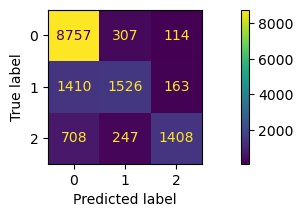

In [51]:
from sklearn import metrics

# actual = numpy.random.binomial(1,.9,size = 1000)
# predicted = numpy.random.binomial(1,.9,size = 1000)
actual = sentiment_analyzer_df.airline_sentiment
predicted = sentiment_analyzer_df[tf_pred_col]
confusion_matrix = metrics.confusion_matrix(actual, predicted)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show() 

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_vld,sentiment_analyzer_df.loc[vld_idx, tf_pred_col] ))

              precision    recall  f1-score   support

    negative       0.80      0.96      0.88      1836
     neutral       0.73      0.47      0.57       619
    positive       0.86      0.60      0.71       473

    accuracy                           0.80      2928
   macro avg       0.80      0.68      0.72      2928
weighted avg       0.80      0.80      0.78      2928

